In [3]:
from merge_packages import merge_packages

import numpy as np
import pandas as pd

from tqdm.auto import tqdm
from collections import OrderedDict

import matplotlib.pyplot as plt
from clean_text import clean_text


In [4]:
cur_packages = merge_packages()


In [5]:
def get_bad_packages(word_threshold=12):
    bad_packages = []

    for cur_package in cur_packages.name:
        cur_readme = open(f"tmp/text_readmes/{cur_package}.txt").read()
        
        cur_split = clean_text(cur_readme).split()

        if len(set(cur_split)) < word_threshold :
            bad_packages.append(cur_package)
            continue
            
    return bad_packages
    

In [6]:
bad_dict = OrderedDict()

for cur_threshold in tqdm(range(40)):
    bad_dict[cur_threshold] = get_bad_packages(cur_threshold)
    

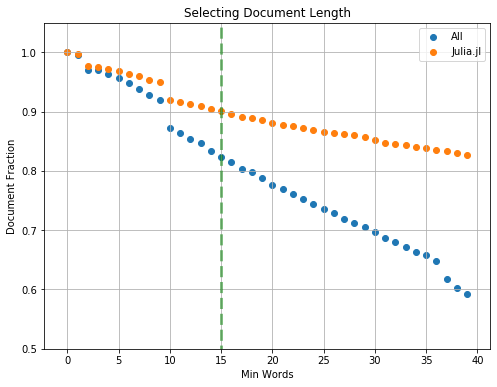

In [31]:
cur_keys = []
cur_values = []
other_values = []

plt.figure(figsize=(8,6))
for cur_key, cur_value in bad_dict.items():
    cur_keys.append(cur_key)
    cur_values.append(len(cur_value))
    
    cur_count = 0
    
    tmp_packages = cur_packages[cur_packages.name.isin(cur_value) & (cur_packages.type == "decibans")]
    other_values.append(len(tmp_packages))

plt.scatter(cur_keys, 1 - np.array(cur_values) / len(cur_packages))
plt.scatter(cur_keys, 1 - np.array(other_values) / len(cur_packages))
plt.ylim(0.5,1.05)
plt.grid(True)

plt.xlabel("Min Words")
plt.ylabel("Document Fraction")
plt.title("Selecting Document Length")
plt.legend(["All", "Julia.jl"])
plt.plot([15,15],[0,1.5],alpha=0.5,c="green", linestyle="dashed", linewidth=3)

In [8]:
for ii in range(12, 20):
    print(ii, np.round( 100 * np.array([cur_values[ii], other_values[ii]]) / len(cur_packages) ))


12 [15.  9.]
13 [15.  9.]
14 [17. 10.]
15 [18. 10.]
16 [19. 10.]
17 [20. 11.]
18 [20. 11.]
19 [21. 11.]


In [15]:
used_threshold = 15


In [16]:
sub_packages = cur_packages[~cur_packages.name.isin(bad_dict[used_threshold])].copy()


In [17]:
sub_packages.to_pickle("./data/sub_packages.pkl")


In [22]:
for cur_package in sub_packages.name:
    input_file = f"tmp/text_readmes/{cur_package}.txt"
    output_file = f"tmp/clean_readmes/{cur_package}.txt"
    
    cur_readme = open(input_file).read()
    
    with open(output_file, "w") as cur_file:
        cur_file.write(clean_text(cur_readme))
